In [3]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\lzyda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [88]:
#imports for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

# Data Acquisition and Processing

## Load Data

In [57]:
df = pd.read_csv("./data/raw/Base.csv")

In [59]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [60]:
df = reduce_mem_usage(df)

Mem. usage decreased to 77.25 Mb (68.4% reduction)


In [61]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.300049,0.986328,-1,25,40,0.006737,102.437500,AA,1059,...,0,1500.0,0,INTERNET,16.218750,linux,1,1,0,0
1,0,0.799805,0.617188,-1,89,20,0.010094,-0.849609,AD,1658,...,0,1500.0,0,INTERNET,3.363281,other,1,1,0,0
2,0,0.799805,0.996582,9,14,40,0.012314,-1.490234,AB,1095,...,0,200.0,0,INTERNET,22.734375,windows,0,1,0,0
3,0,0.600098,0.475098,11,14,30,0.006992,-1.863281,AB,3483,...,0,200.0,0,INTERNET,15.218750,linux,1,1,0,0
4,0,0.899902,0.842285,-1,29,40,5.742188,47.156250,AA,2339,...,0,200.0,0,INTERNET,3.742188,other,0,1,0,0


In [10]:
pd.DataFrame(df['fraud_bool'].value_counts())

,fraud_bool
0,988971
1,11029


In [18]:
numerical_columns = df.select_dtypes('number').columns
categorical_columns = df.select_dtypes('object').columns

<AxesSubplot: xlabel='fraud_bool', ylabel='count'>

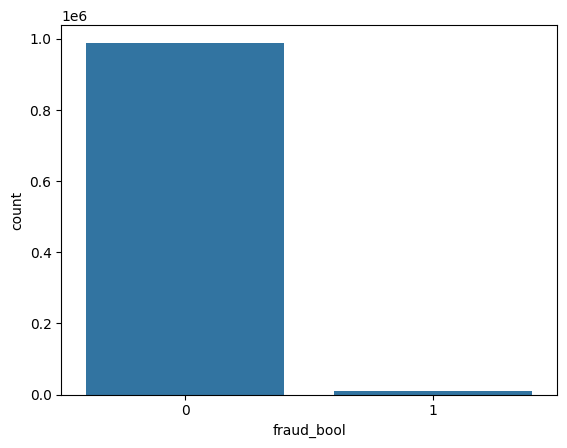

In [66]:
sns.countplot(data=df, x='fraud_bool')

<AxesSubplot: xlabel='credit_risk_score', ylabel='Density'>

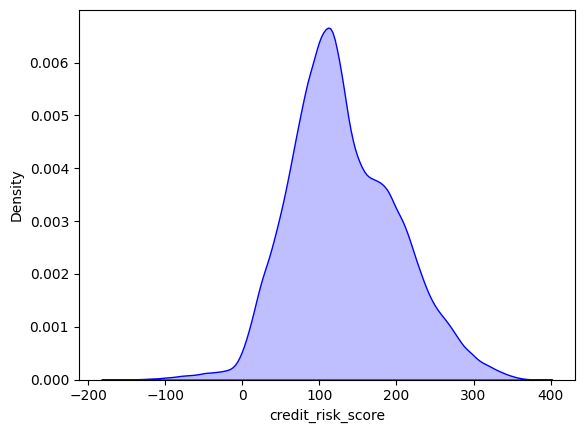

In [76]:
sns.kdeplot(df['credit_risk_score'], color='blue', fill=True)

## Data Cleaning

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int8   
 1   income                            1000000 non-null  float16
 2   name_email_similarity             1000000 non-null  float16
 3   prev_address_months_count         1000000 non-null  int16  
 4   current_address_months_count      1000000 non-null  int16  
 5   customer_age                      1000000 non-null  int8   
 6   days_since_request                1000000 non-null  float16
 7   intended_balcon_amount            1000000 non-null  float16
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int16  
 10  velocity_6h                       1000000 non-null  float16
 11  velocity_24h                      1000

In [28]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [53]:
for column in categorical_columns:
    print(f"Distribution for '{column}':\n{df[column].value_counts()}")

print("\nSummary Statistics of Numerical Features:\n")
df[numerical_columns].describe()

Distribution for 'payment_type':
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: payment_type, dtype: int64
Distribution for 'employment_status':
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: employment_status, dtype: int64
Distribution for 'housing_status':
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: housing_status, dtype: int64
Distribution for 'source':
INTERNET    992952
TELEAPP       7048
Name: source, dtype: int64
Distribution for 'device_os':
other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: device_os, dtype: int64

Summary Statistics of Numerical Features:



,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


# Feature Engineering

In [80]:
for col in categorical_columns:
    enc = OneHotEncoder()
    

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

# Exploration of Data

## Distribution of numerical columns

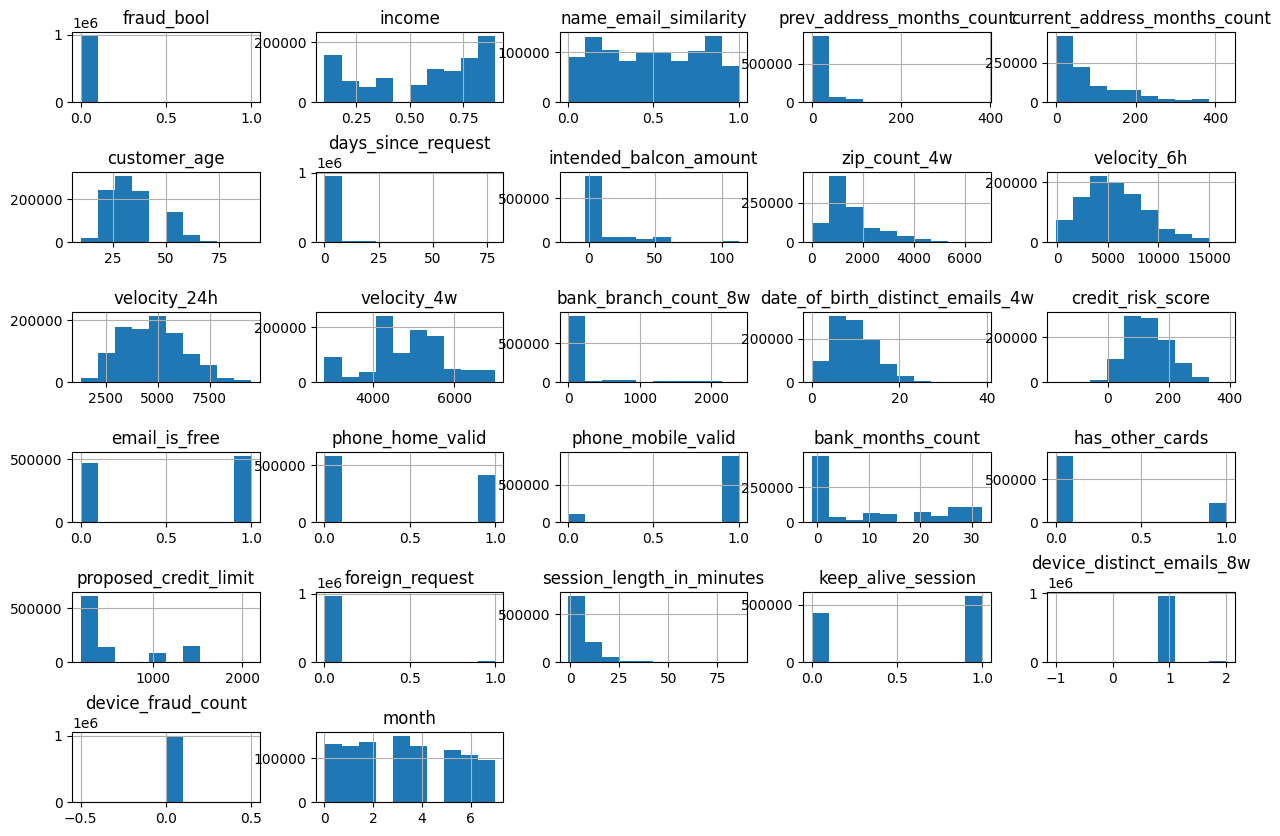

In [44]:
df_numerical = df[numerical_columns]

df_numerical.hist(figsize=(15,10))
plt.subplots_adjust(hspace=1)
plt.show()

## Number of fraud cases per age group

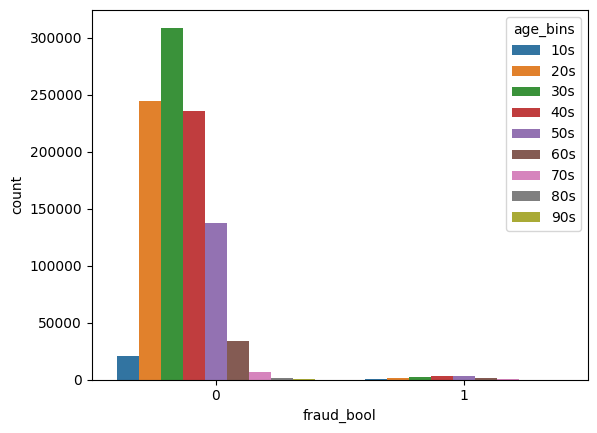

In [89]:
age_bins = pd.cut(df["customer_age"], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False, labels=["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"])
df["age_bins"] = age_bins

sns.countplot(x="fraud_bool", data=df, hue="age_bins")
plt.show()

## Distribution of Categorical Columns

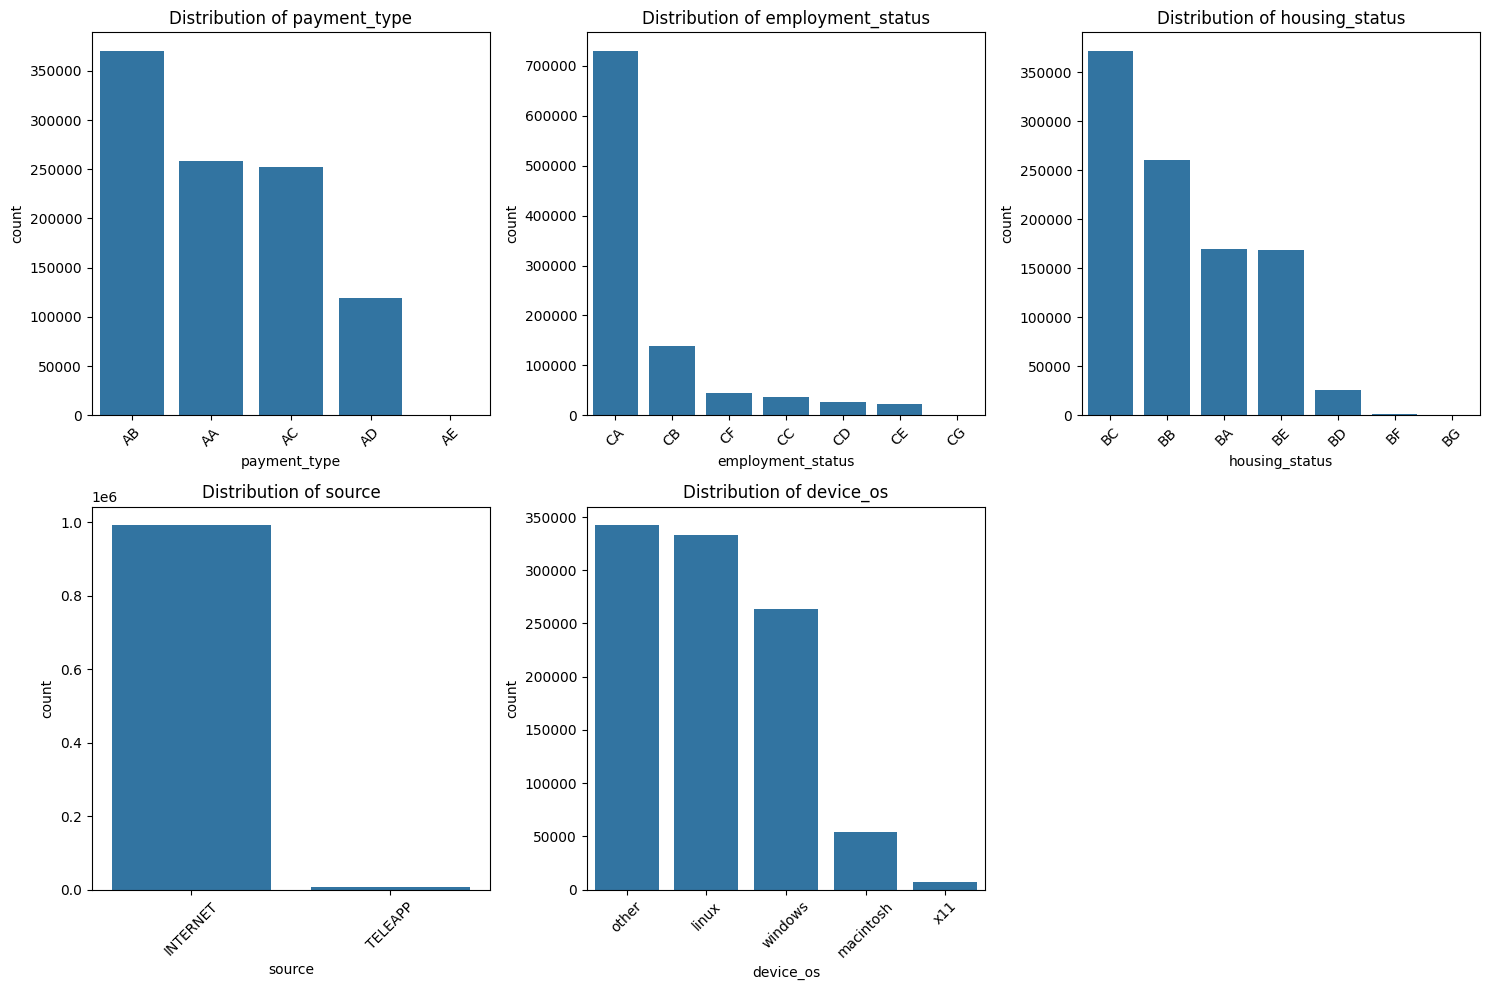

In [87]:
ncols = 3 # number of columns in graph grid

nrows = (len(categorical_columns) + ncols - 1) // ncols  # Calculate the number of rows needed
    
plt.figure(figsize=(15, 5 * nrows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Descriptive Statistics

## Correlation Analysis

C:\Users\lzyda\AppData\Local\Temp\ipykernel_14012\3646754692.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


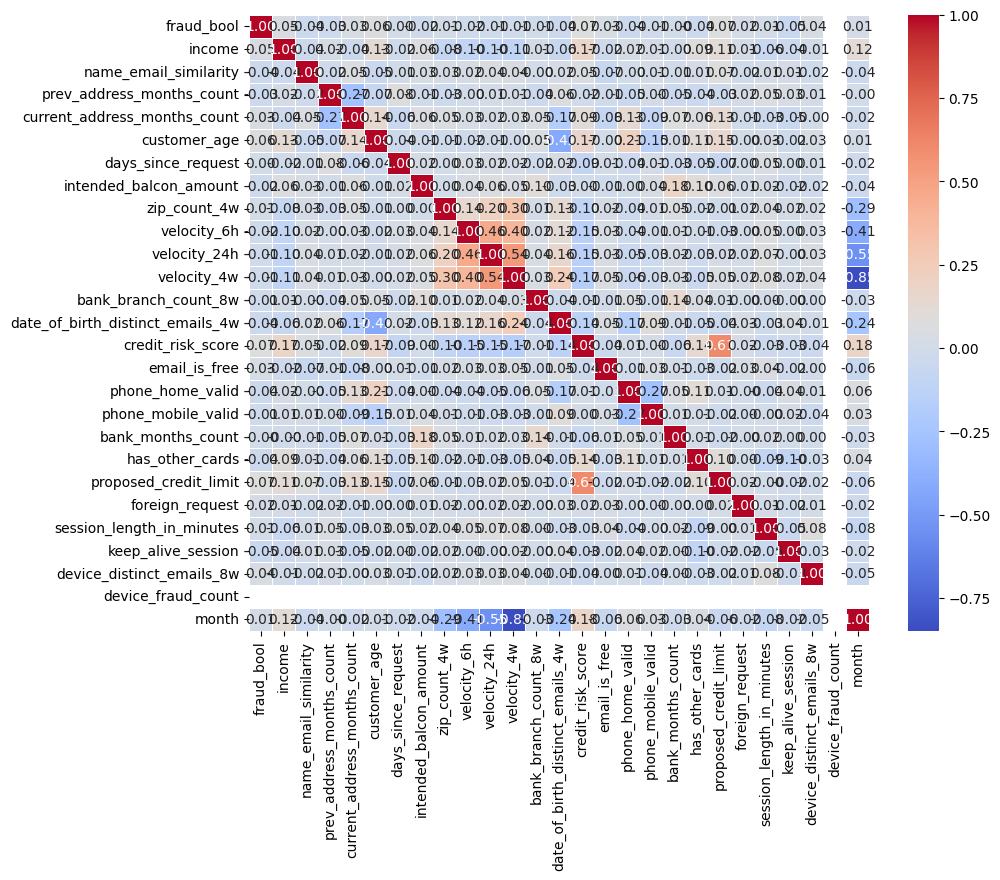

In [62]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

## Hypothesis Testing (?)

## Conclusions